In [4]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import string
import nltk
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
df=pd.read_csv('C:/Users/Poorvi/OneDrive/Desktop/twitter_training.csv')

In [5]:
# Assigning proper column names
column_names = ['ID', 'Category', 'Sentiment', 'Tweet']
df.columns = column_names
print(df)

         ID     Category Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74676  9200       Nvidia  Positive   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   

                                                   Tweet  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized that my Mac window partition is ...  
74678  Just 

In [6]:
print(df.head())

     ID     Category Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               Tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [7]:
print(df.shape)
print(df.info())

(74681, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Category   74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Tweet      73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [8]:
print(df.isnull().sum())

ID             0
Category       0
Sentiment      0
Tweet        686
dtype: int64


In [9]:
print(df['Sentiment'].value_counts())

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [10]:
#downloading stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Poorvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
port_stem=PorterStemmer()
def clean_text(text):
    if isinstance(text, float):  # Check if the text is a float (NaN)
        text = ''
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    words = [port_stem.stem(word)for word in words if not word in stopwords]
    words=' '.join(words)
    return words

# Apply the clean_text function to the 'Tweet' column
df['Cleaned_Tweet'] = df['Tweet'].apply(clean_text)

# Display the first few rows of the cleaned data
print(df[['Tweet', 'Cleaned_Tweet']].head())


                                               Tweet  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

               Cleaned_Tweet  
0           come border kill  
1     im get borderland kill  
2  im come borderland murder  
3   im get borderland murder  
4   im get borderland murder  


In [12]:
X=df['Cleaned_Tweet'].values
Y=df['Sentiment'].values
print(X)
print(Y)

['come border kill' 'im get borderland kill' 'im come borderland murder'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [13]:
X_train, X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape,X_test.shape)
print(X_train)
print(X_test)

(74681,) (59744,) (14937,)
['sorri wow'
 'honor joy part borderland theater tucson product latin anonym direct co written dian rodriguez sadden loss pic twitter com hjlcwyey'
 'ps box seri movi underr game featur time changer tech dsmender com ps xbox'
 ... 'swear mf unk say bro wtf mean'
 'may first observ maco develop make internet go span decad half entir time like lol fuck except microsoft buy open sourc day perhap web centric laptop next'
 'gta v much fun def cup pork begin sold steal car throw hoe ran pretti good crew go w therealvondroid roadsidedown noob salad go shoot stream stream']
['wait girl buy ps order xbox seri x'
 'outcom complaint probe period suggest'
 'nba k give us anoth shot galaxi btw great game' ...
 'bjp bengal rimjhim mitra make mislead post facebook wbpolic kolkatapolic pleas look take appropri action link facebook com po http co blizxnyoif'
 'owl realli go downhil'
 'report nvidia approach arm takeov tomshardwar com news report nv']


In [14]:
vectorizer = TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)
print(X_train)
print(X_test)

  (0, 17025)	0.7464150727760767
  (0, 20608)	0.6654806827644844
  (1, 8281)	0.21475701847320758
  (1, 9507)	0.23195808389050593
  (1, 13370)	0.16622425071541297
  (1, 2030)	0.1387635302768844
  (1, 18201)	0.2760159081333617
  (1, 18918)	0.29055869100893156
  (1, 14226)	0.16960754647253448
  (1, 10221)	0.2733025061694837
  (1, 635)	0.2499298690926748
  (1, 4529)	0.20723684167833836
  (1, 3200)	0.12385604524626591
  (1, 20652)	0.2467034951847979
  (1, 4454)	0.2861701486912575
  (1, 15525)	0.2957492348865915
  (1, 15803)	0.26854661459180046
  (1, 10707)	0.21646226900712104
  (1, 13708)	0.10991199943335168
  (1, 19004)	0.1102723204827327
  (1, 3302)	0.08638026711376635
  (1, 8172)	0.2957492348865915
  (2, 3302)	0.12503295802700895
  (2, 14317)	0.38928347200775004
  (2, 2081)	0.2756660049041782
  :	:
  (59742, 12746)	0.2558349296745109
  (59742, 2752)	0.3054142865377641
  (59743, 7549)	0.13048368034350843
  (59743, 7241)	0.2086440755589619
  (59743, 11951)	0.12406022911495729
  (59743, 1415

In [15]:
#Training the machine learning model
#Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [16]:
        #ModelEvaluation
#AccuracyScore on training data
X_train_prediction=logreg.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score on the training data: ",training_data_accuracy)
#AccuracyScore on test data
X_test_prediction=logreg.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score on the test data: ",test_data_accuracy)

Accuracy score on the training data:  0.8294054633101232
Accuracy score on the test data:  0.7688960299926357


In [18]:
 #saving the trained model
filename='trained_model.sav'
pickle.dump(logreg,open(filename,'wb'))
        #using the saved model for future predictions
        #loading the saved model
loaded_model = pickle.load(open('C:/Users/Poorvi/OneDrive/Desktop/trained_model.sav', 'rb'))
# Select a test sample for prediction
X_new = X_test[200]
Y_actual = Y_test[200]
print("Actual Sentiment:", Y_actual)
# Predict using the trained model
prediction = loaded_model.predict(X_new)
print("Predicted Sentiment:", prediction[0])
if prediction[0] == 'Negative':
    print('Negative Tweet')
elif prediction[0] == 'Positive':
    print('Positive Tweet')
else:
    print('Neutral Tweet')

Actual Sentiment: Positive
Predicted Sentiment: Positive
Positive Tweet


Plot sentiment distribution

C:\Users\Poorvi\AppData\Local\Temp\ipykernel_16456\827589875.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


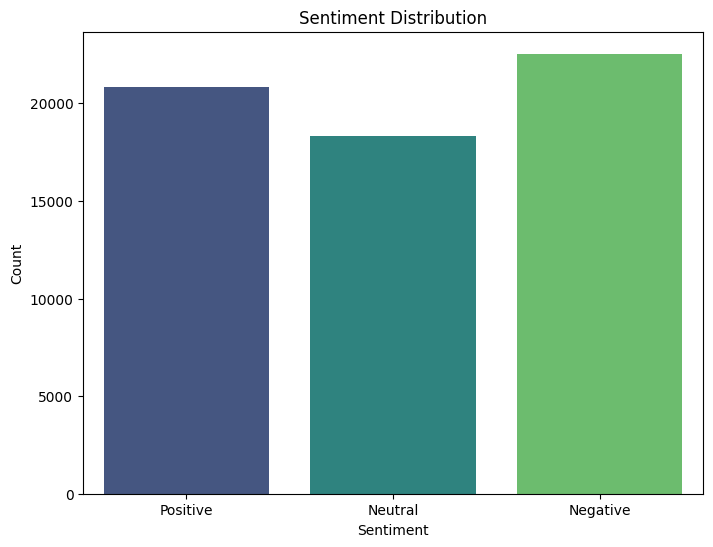

In [19]:
# Filter out any irrelevant or unexpected sentiment values
expected_sentiments = ['Positive', 'Negative', 'Neutral']
df = df[df['Sentiment'].isin(expected_sentiments)]
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Generating word clouds

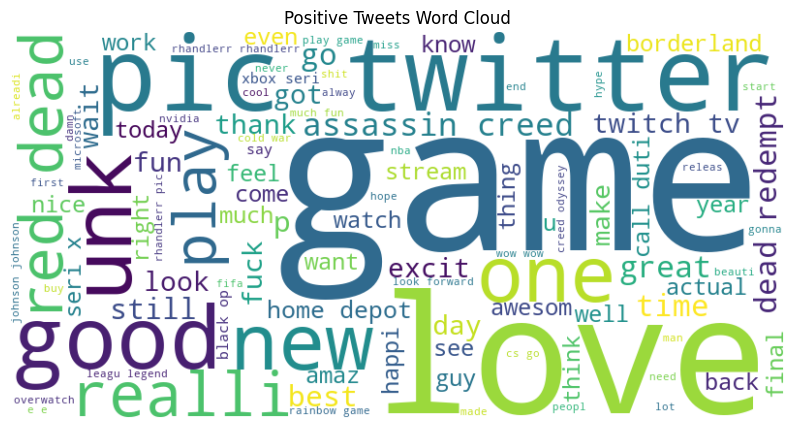

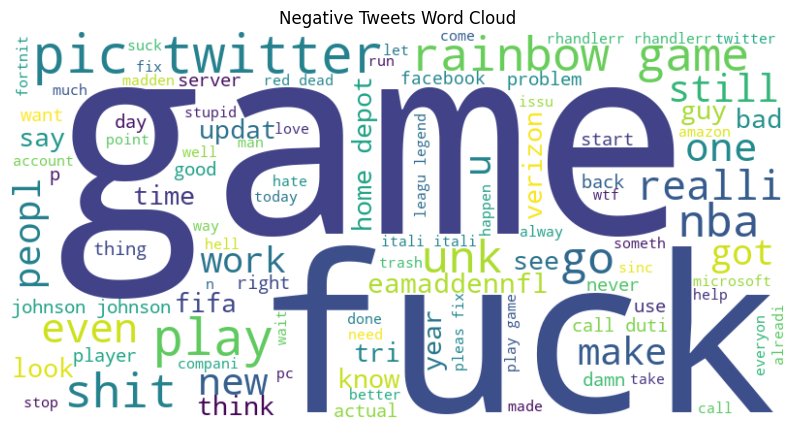

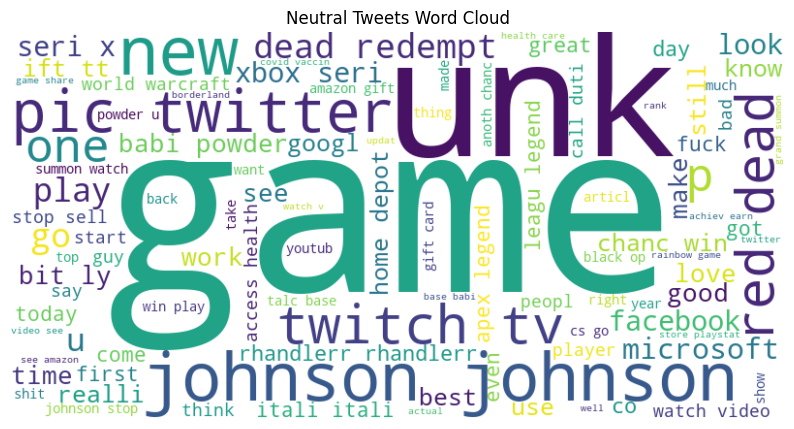

In [20]:
# Function to generate word cloud
def generate_word_cloud(df, title):
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(' '.join(df))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
positive_tweets = df[df['Sentiment'] == 'Positive']['Cleaned_Tweet']
negative_tweets =df[df['Sentiment'] == 'Negative']['Cleaned_Tweet']
neutral_tweets = df[df['Sentiment'] == 'Neutral']['Cleaned_Tweet']

generate_word_cloud(positive_tweets, 'Positive Tweets Word Cloud')
generate_word_cloud(negative_tweets, 'Negative Tweets Word Cloud')
generate_word_cloud(neutral_tweets, 'Neutral Tweets Word Cloud')


Length of tweets by sentiment

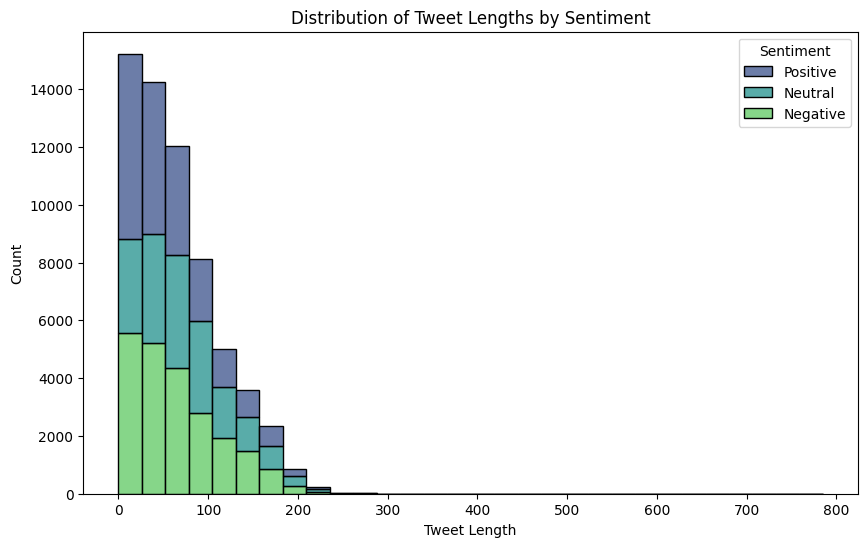

In [21]:
df['Tweet_Length'] = df['Cleaned_Tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Tweet_Length', hue='Sentiment', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Tweet Lengths by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()